# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [12]:
%%writefile {experiments.shl.cache_dir}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'
try:
    n_jobs = sys.argv[2]
except:
    n_jobs = 1
    n_jobs = 4
    n_jobs = 9
    n_jobs = 10
    n_jobs = 35

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, verbose=0)

experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'alpha_MP', 'eta_precision', ]
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'alpha_MP']
variables = ['eta', 'eta_homeo', 'alpha_homeo', 'l0_sparseness']
variables = ['eta', 'eta_homeo', 'alpha_homeo']

list_figures = []
list_figures = ['show_dico', 'show_Pcum']
list_figures = ['show_dico', ]

display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime', 'F']
display_variables = ['error', 'qerror', 'F']

if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='', fig_kwargs={'dim_graph':(2, 15)}, verbose=1)
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting cache_dir/HAP.py


In [5]:
%run {experiments.shl.cache_dir}/{tag}.py load

In [6]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff     1921 Sep 27 13:47 cache_dir/HAP.py
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.10827_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.15872_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.23267_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.34108_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.50000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff        0 Sep 27 13:46 cache_dir/HAP_alpha_homeo=0.54136_dico.pkl_lock
-rw-r--r--  1 laurentperrinet  staff        0 Sep 27 13:46 cache_dir/HAP_alpha_homeo=0.54136_dico.pkl_lock_pid-57891_host-fortytwo
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_alpha_homeo=0.73297_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  2617680 Sep 27 13:30 cache_dir/HAP_a

In [7]:
# this removes older computations and restarts computations
!rm -fr {experiments.shl.cache_dir}/{tag}*pkl
!ls -l {experiments.shl.cache_dir}/{tag}*

-rw-r--r--  1 laurentperrinet  staff  1921 Sep 27 13:47 cache_dir/HAP.py


In [8]:
%run {experiments.shl.cache_dir}/{tag}.py run

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done   1 tasks      | elapsed: 19.7min
[Parallel(n_jobs=35)]: Done   3 out of  36 | elapsed: 20.7min remaining: 227.9min
[Parallel(n_jobs=35)]: Done   6 out of  36 | elapsed: 22.5min remaining: 112.5min
[Parallel(n_jobs=35)]: Done   9 out of  36 | elapsed: 22.5min remaining: 67.6min
[Parallel(n_jobs=35)]: Done  12 out of  36 | elapsed: 22.6min remaining: 45.1min
[Parallel(n_jobs=35)]: Done  15 out of  36 | elapsed: 22.6min remaining: 31.7min
[Parallel(n_jobs=35)]: Done  18 out of  36 | elapsed: 22.7min remaining: 22.7min
[Parallel(n_jobs=35)]: Done  21 out of  36 | elapsed: 22.7min remaining: 16.2min
[Parallel(n_jobs=35)]: Done  24 out of  36 | elapsed: 22.7min remaining: 11.4min
[Parallel(n_jobs=35)]: Done  27 out of  36 | elapsed: 22.7min remaining:  7.6min
[Parallel(n_jobs=35)]: Done  30 out of  36 | elapsed: 22.7min remaining:  4.5min
[Parallel(n_jobs=35)]: Done  33 out of  36 | elap

Running variable eta with value 0.0007


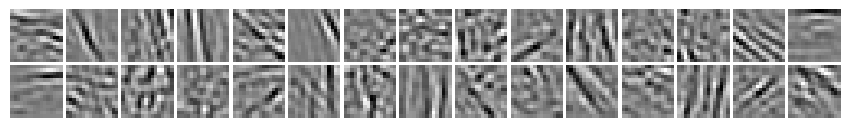

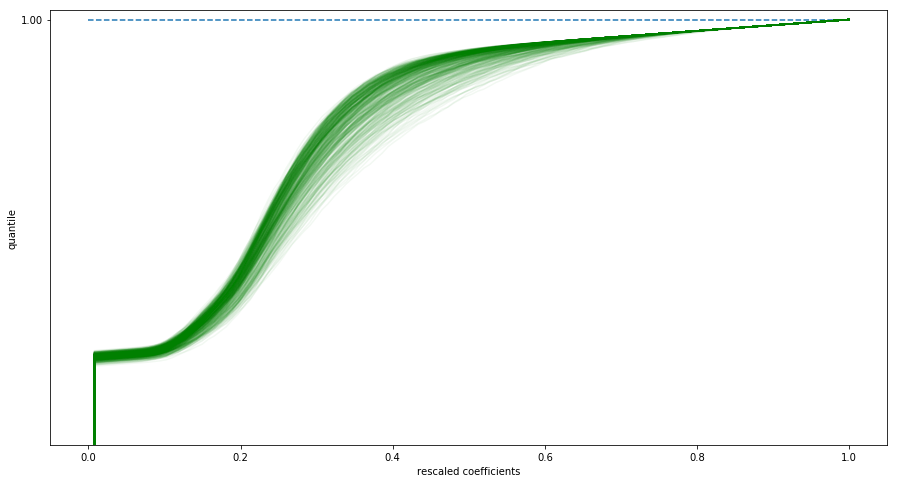

Running variable eta with value 0.0010


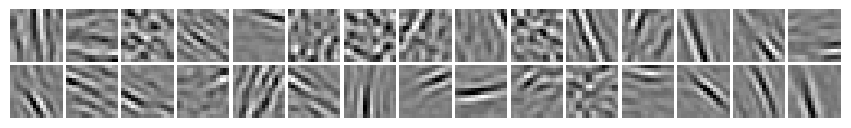

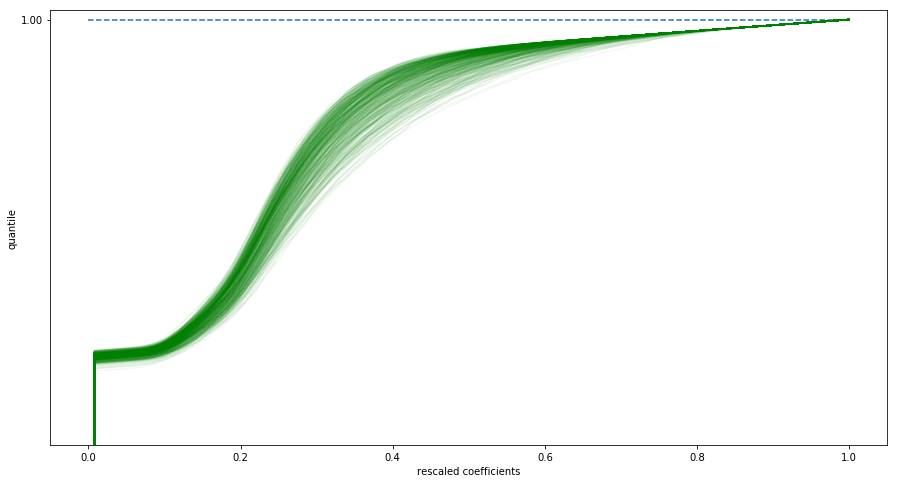

Running variable eta with value 0.0015


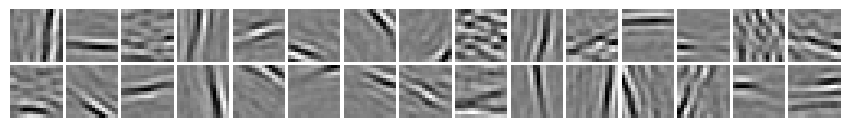

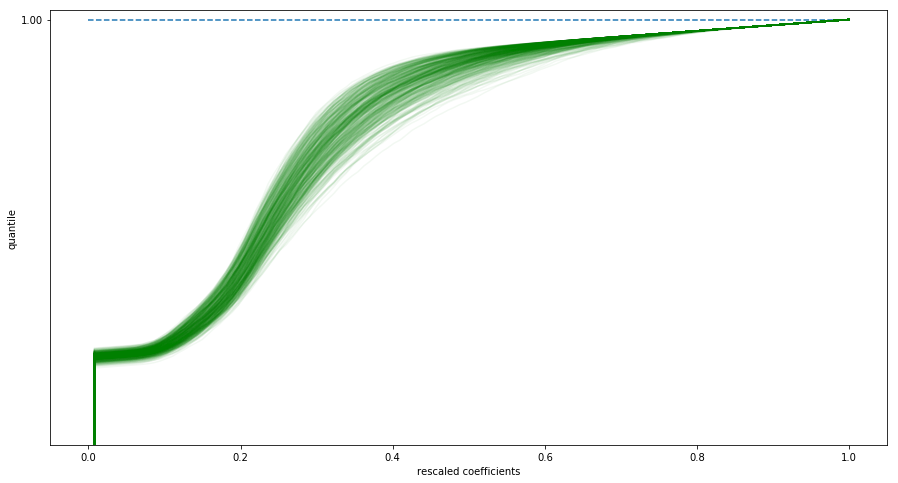

Running variable eta with value 0.0023


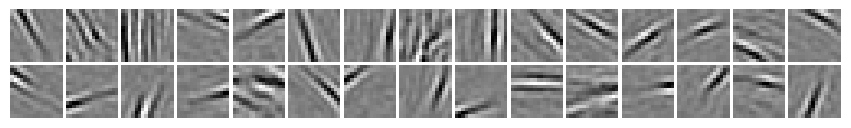

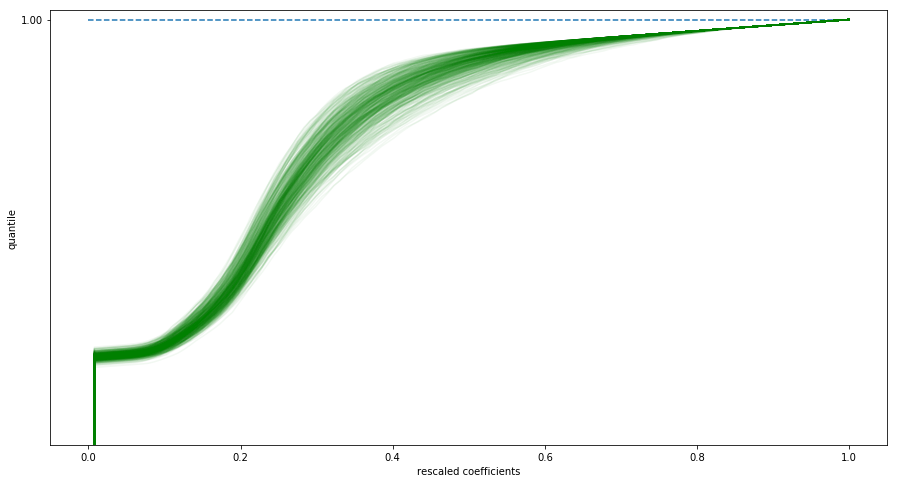

Running variable eta with value 0.0033


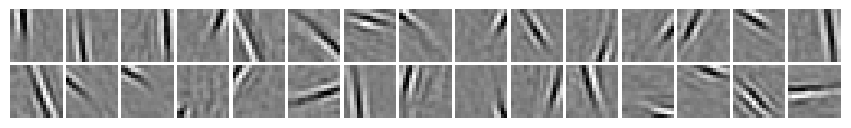

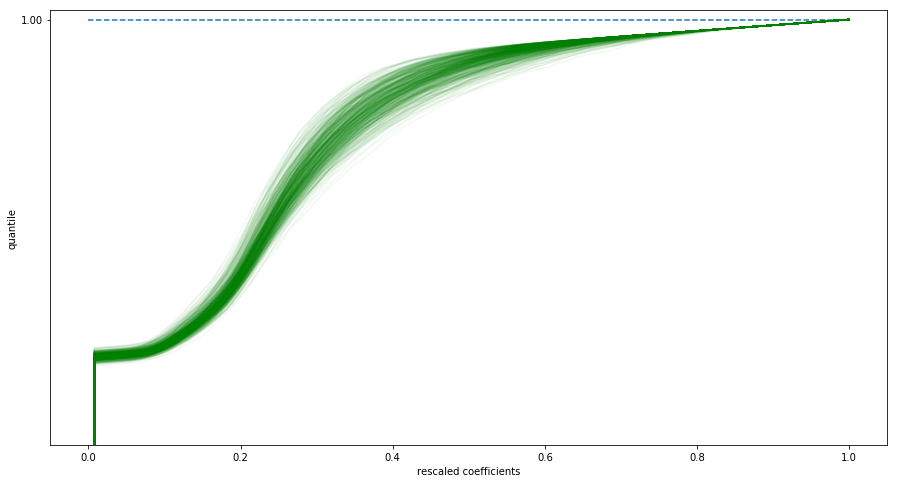

Running variable eta with value 0.0048


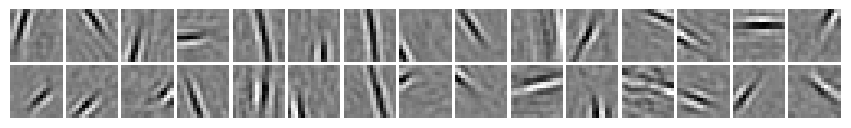

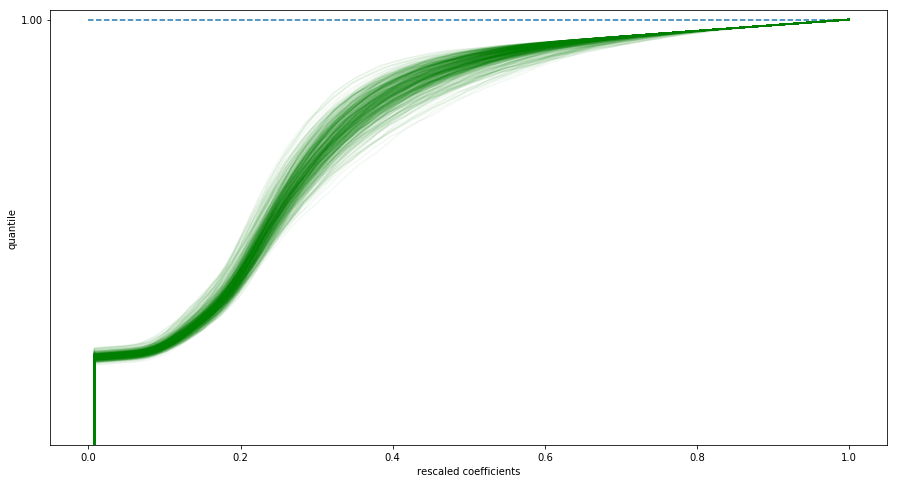

Running variable eta with value 0.0071


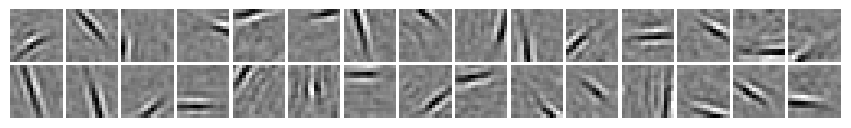

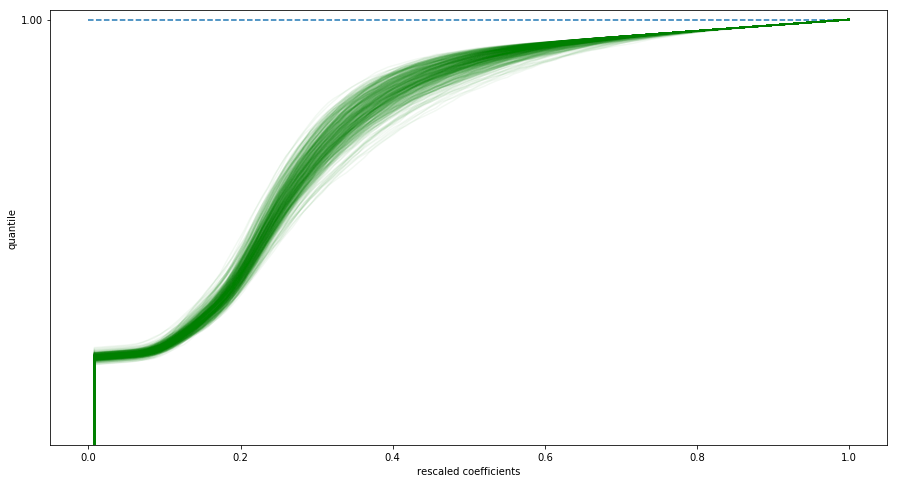

Running variable eta with value 0.0104


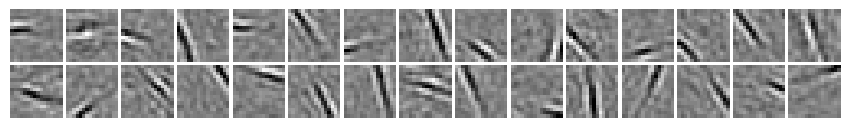

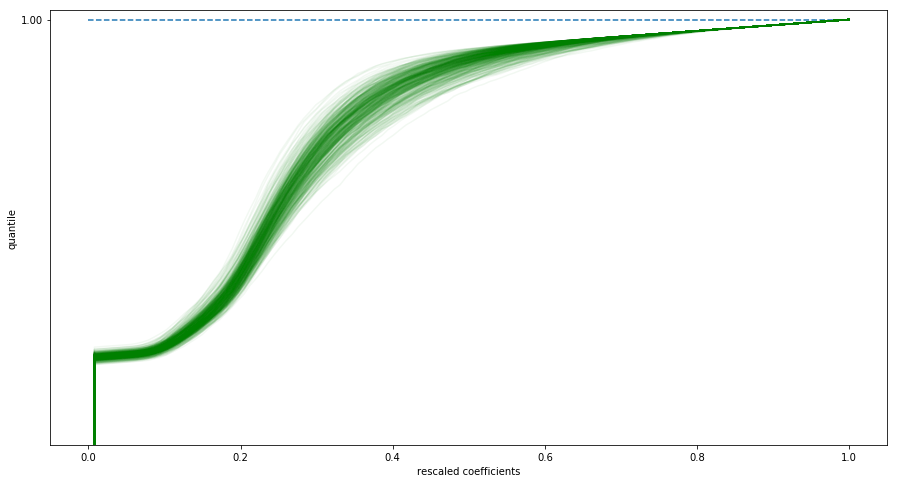

Running variable eta with value 0.0152


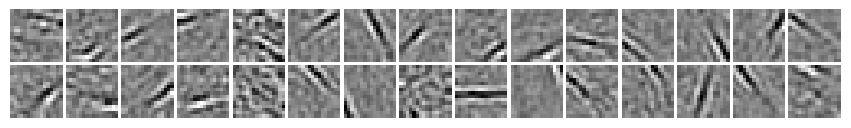

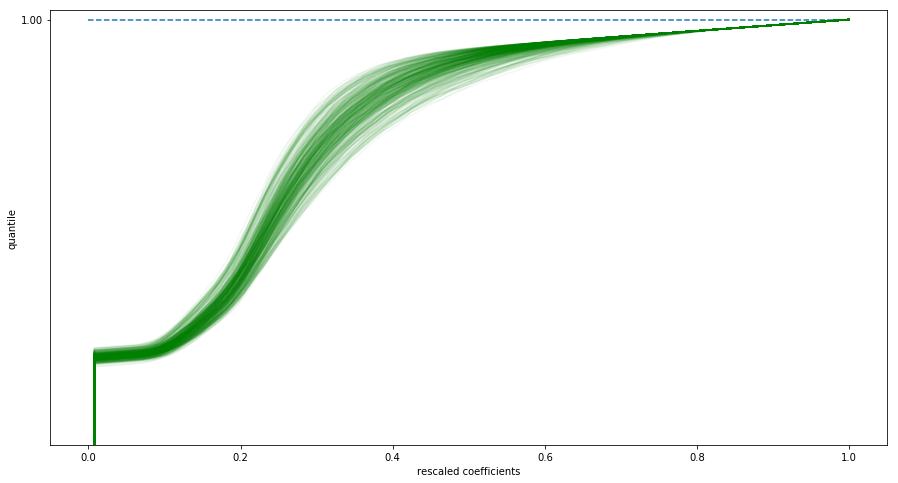

Time evolution of  error


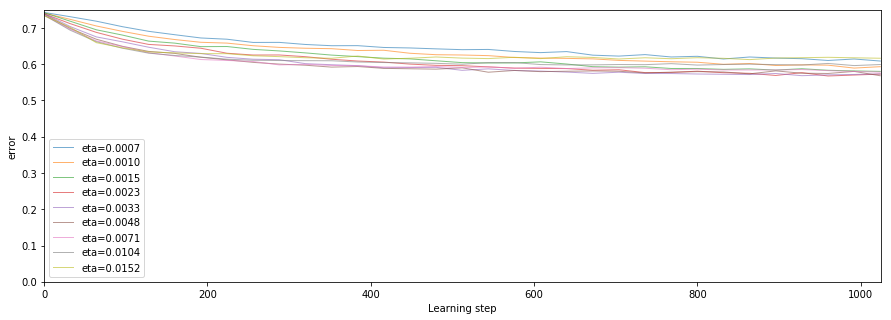

Time evolution of  qerror


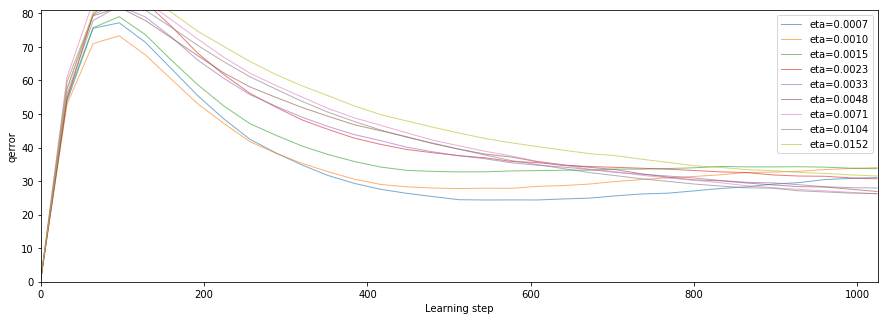

Time evolution of  F


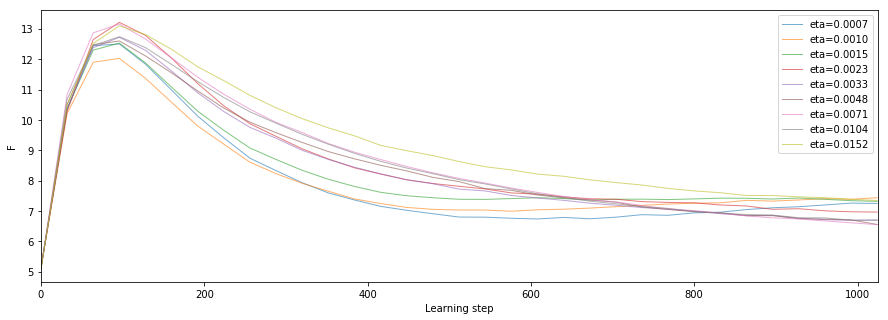

Comparison at the end of learning for  error


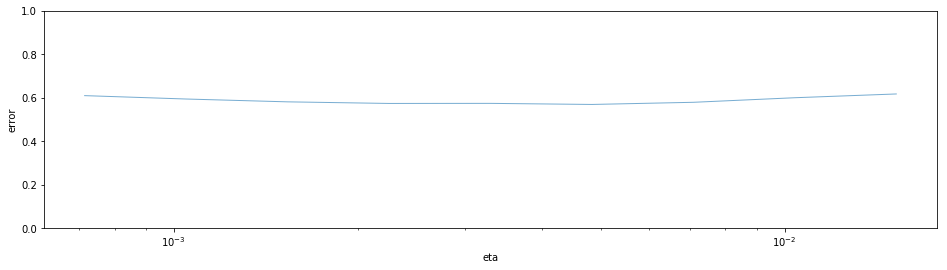

Comparison at the end of learning for  qerror


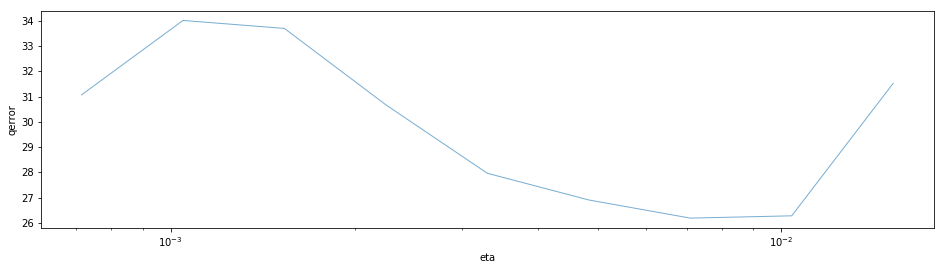

Comparison at the end of learning for  F


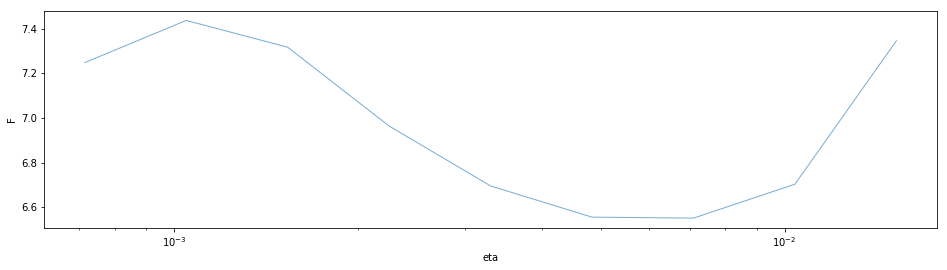

Running variable eta_homeo with value 0.0011


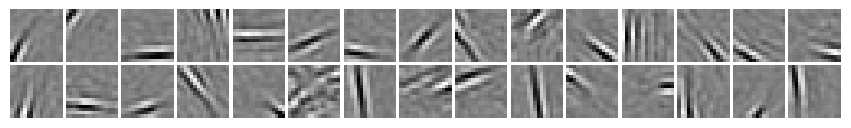

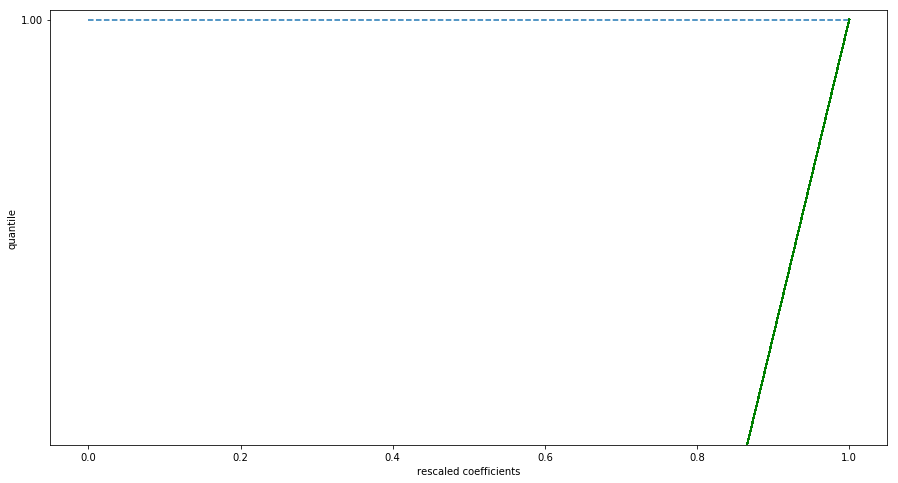

Running variable eta_homeo with value 0.0016


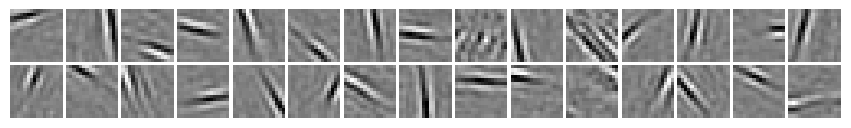

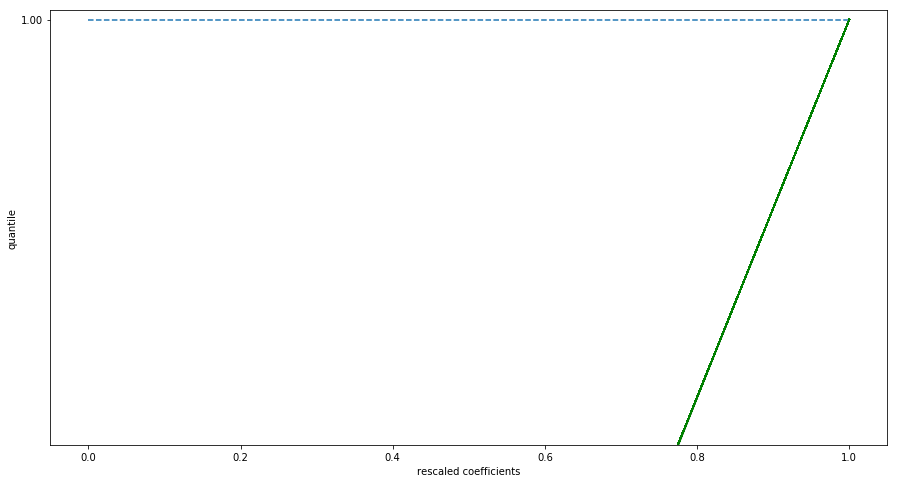

Running variable eta_homeo with value 0.0023


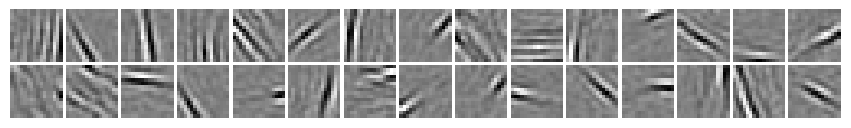

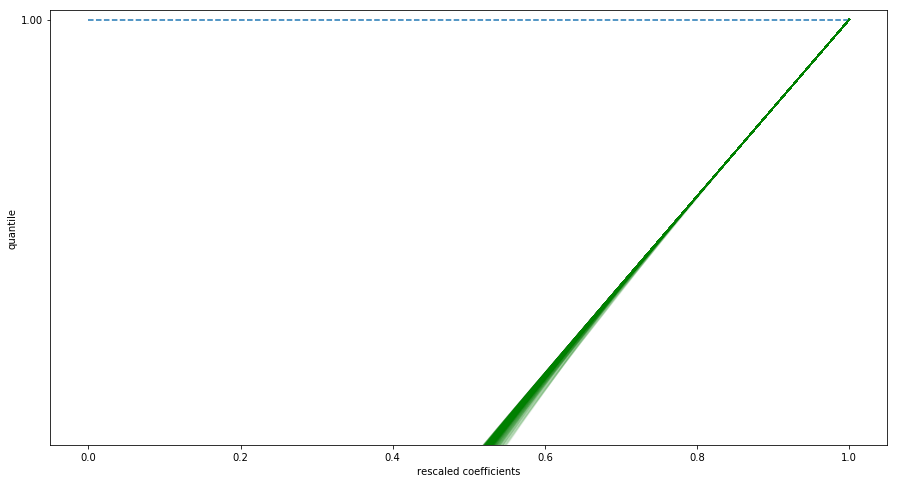

Running variable eta_homeo with value 0.0034


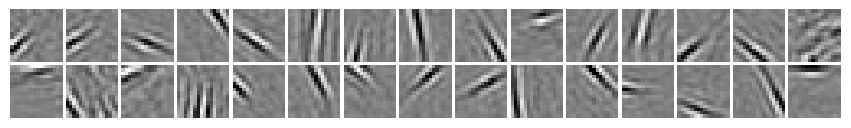

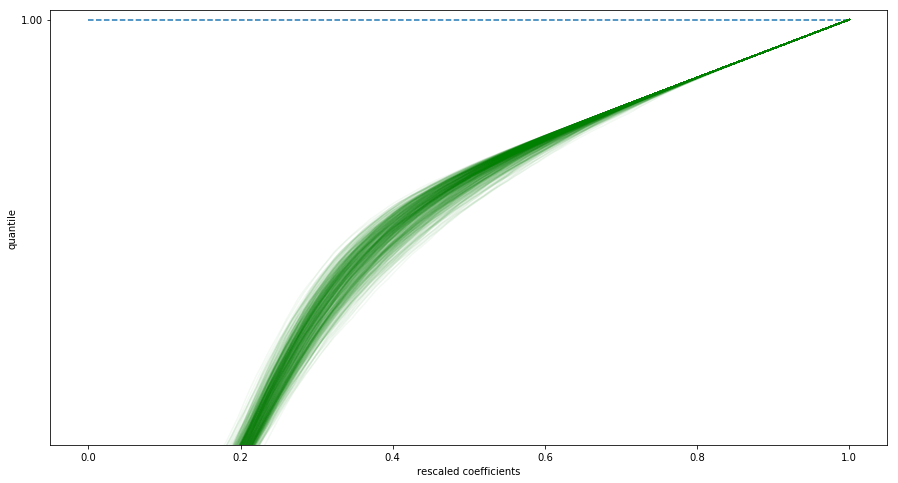

Running variable eta_homeo with value 0.0050


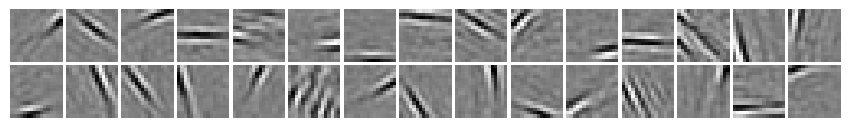

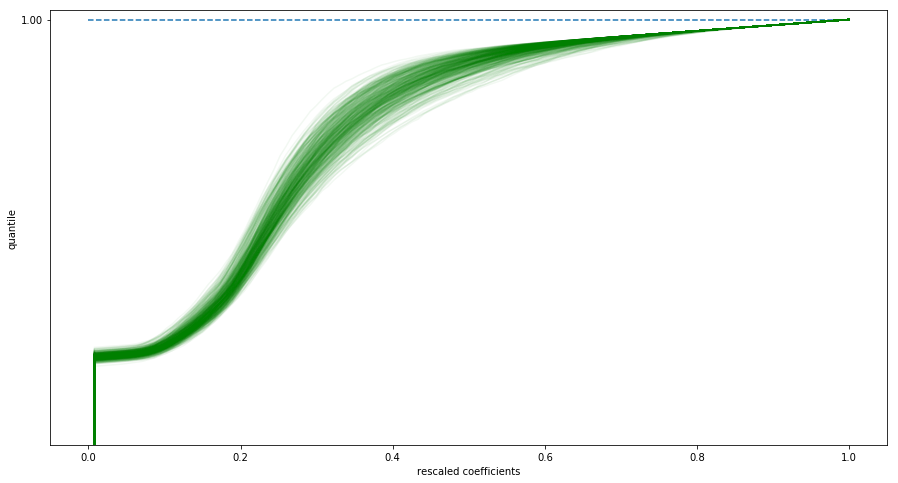

Running variable eta_homeo with value 0.0073


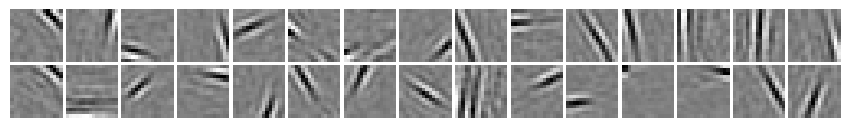

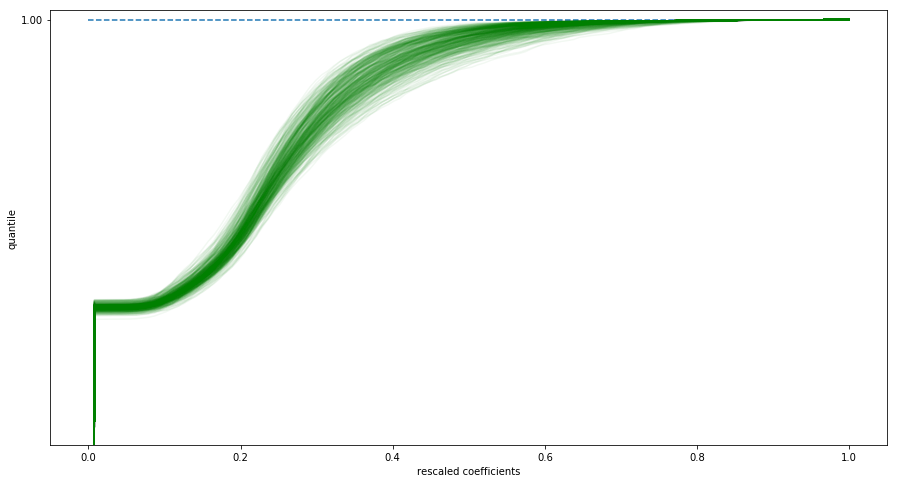

Running variable eta_homeo with value 0.0107


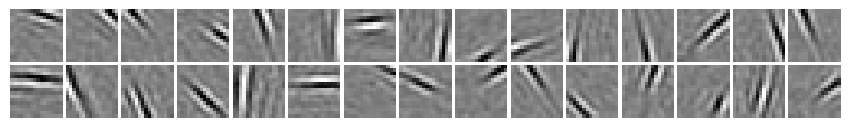

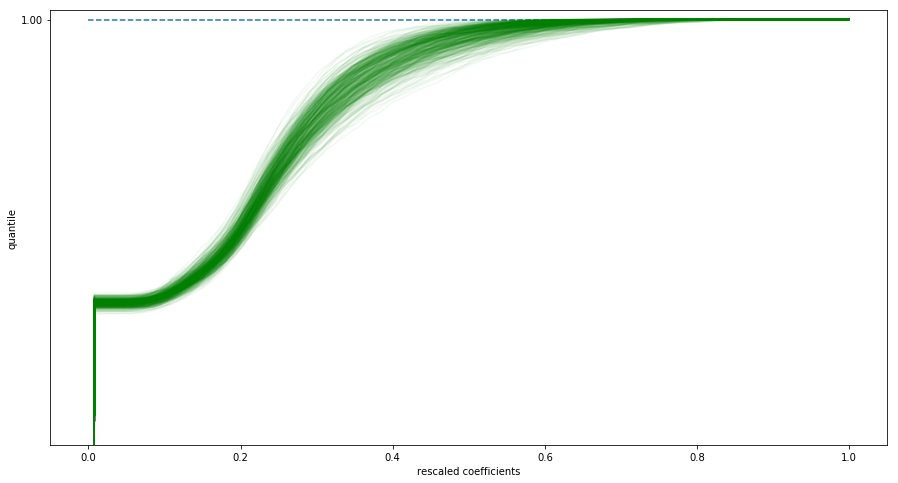

Running variable eta_homeo with value 0.0158


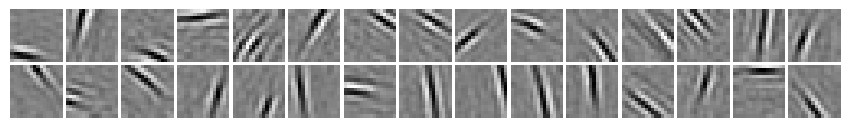

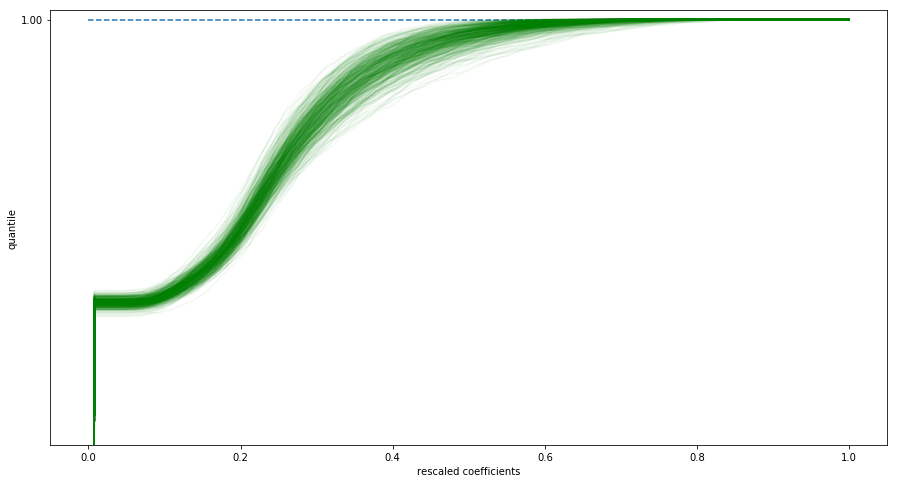

Running variable eta_homeo with value 0.0231


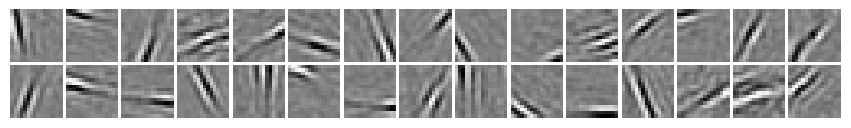

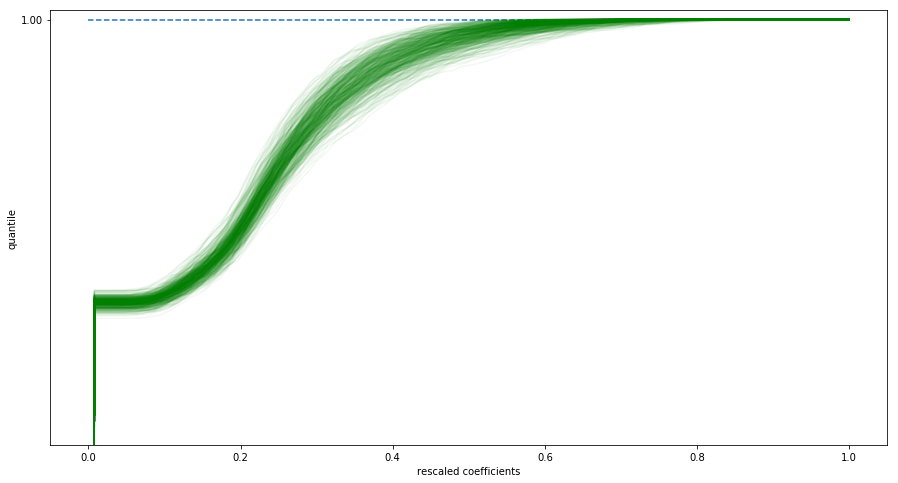

Time evolution of  error


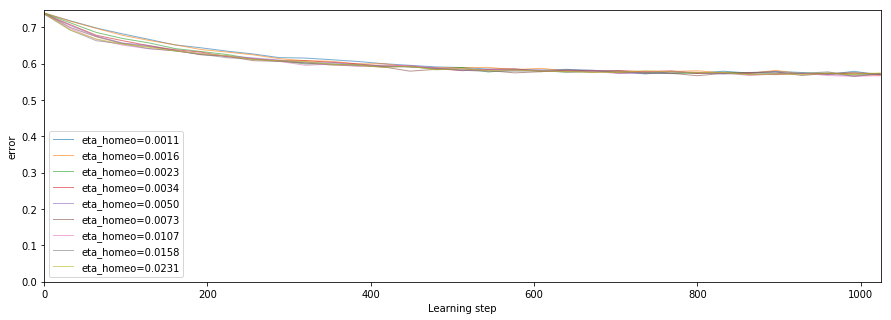

Time evolution of  qerror


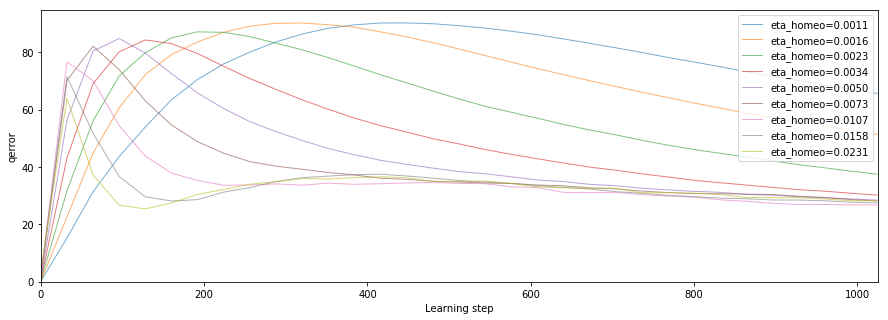

Time evolution of  F


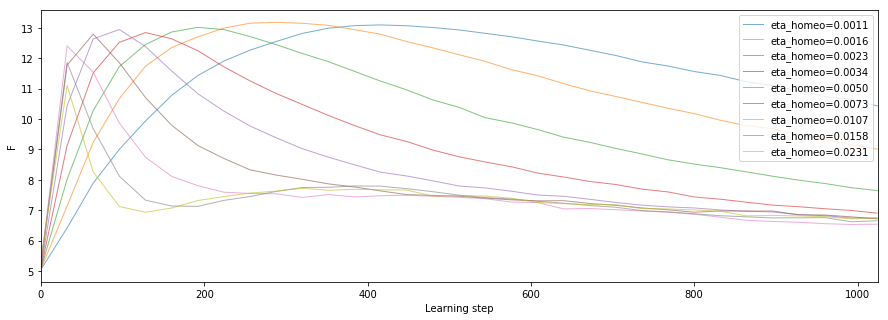

Comparison at the end of learning for  error


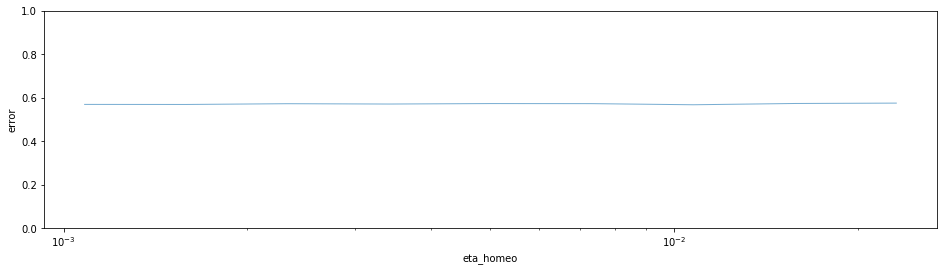

Comparison at the end of learning for  qerror


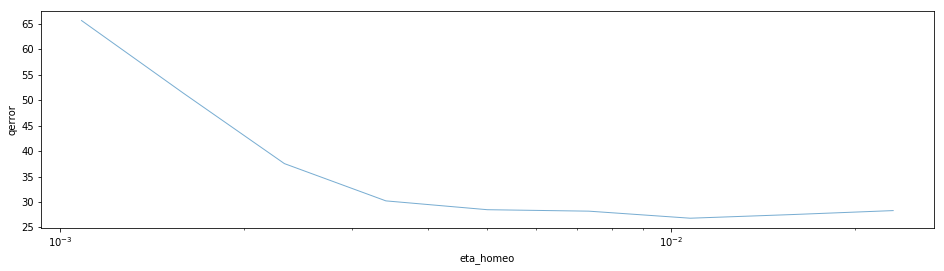

Comparison at the end of learning for  F


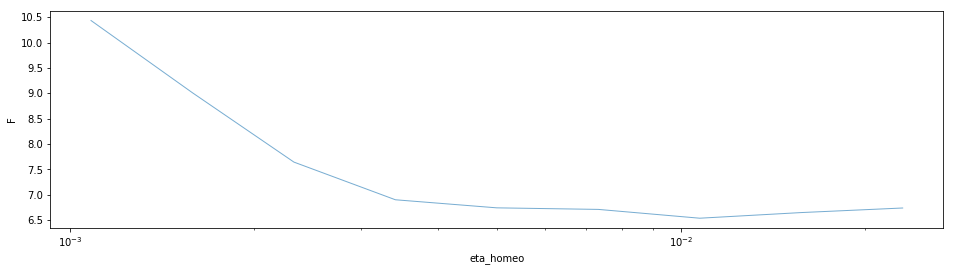

Running variable alpha_homeo with value 0.5414


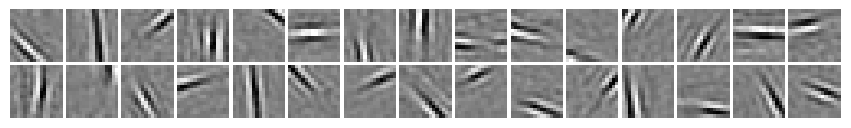

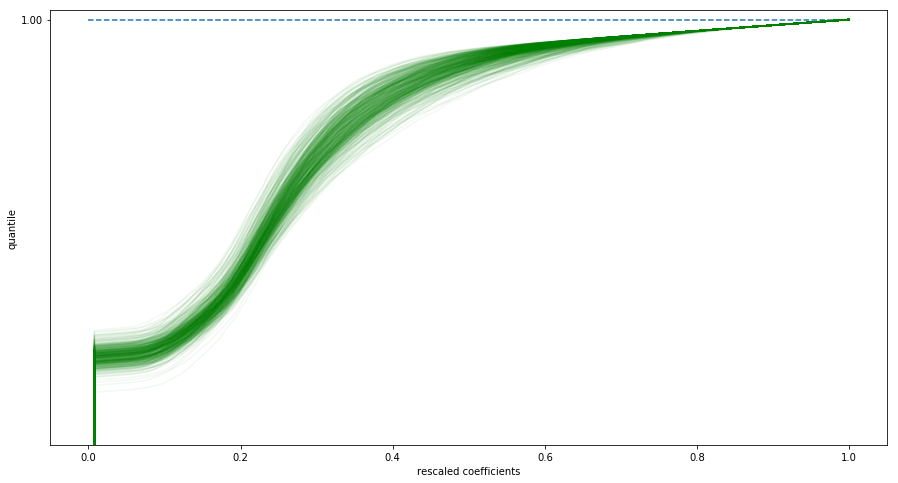

Running variable alpha_homeo with value 0.7936


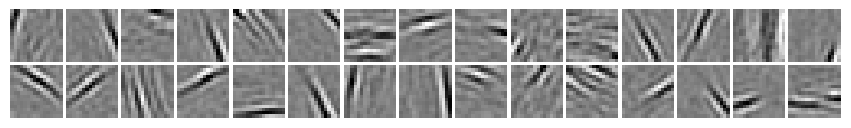

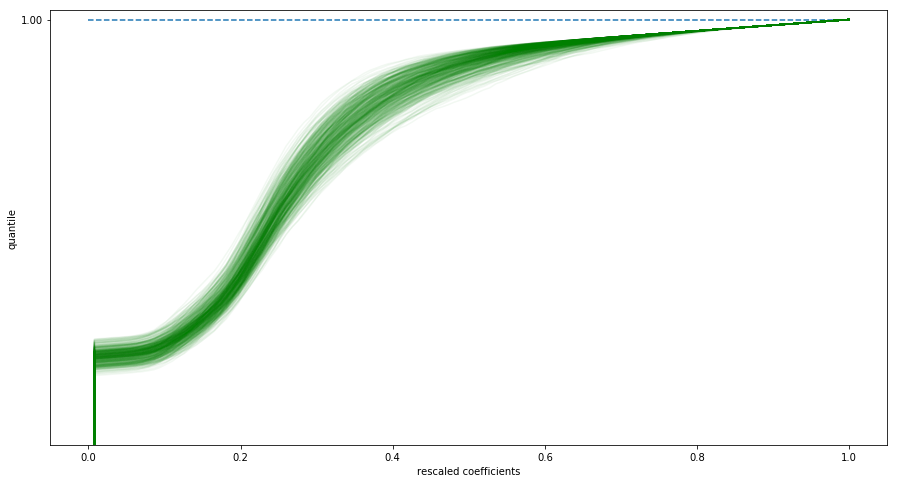

Running variable alpha_homeo with value 1.1634


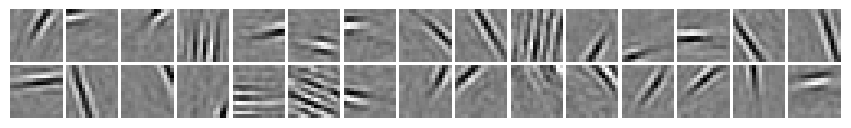

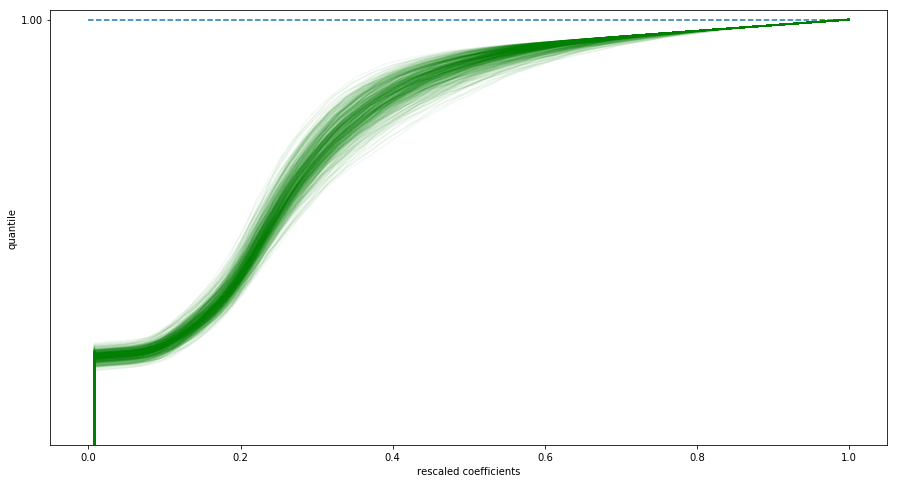

Running variable alpha_homeo with value 1.7054


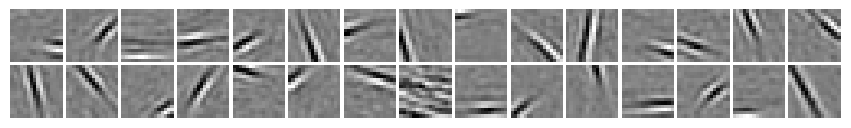

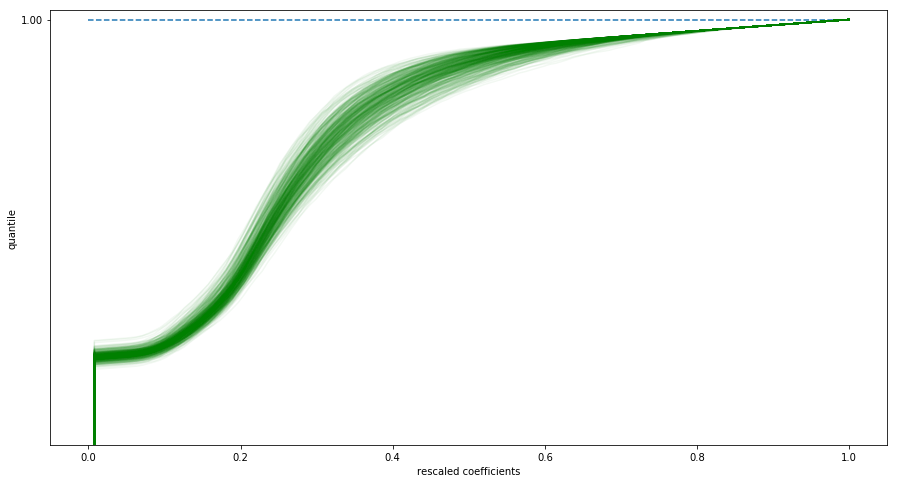

Running variable alpha_homeo with value 2.5000


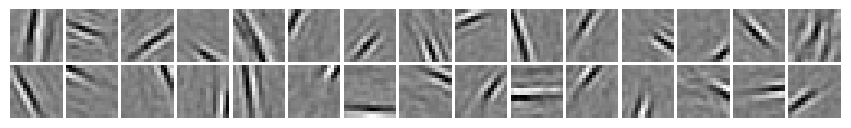

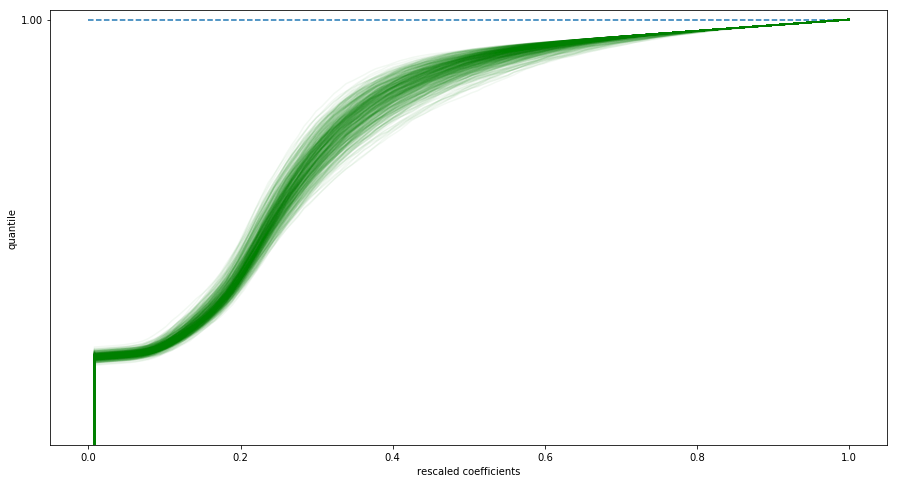

Running variable alpha_homeo with value 3.6648


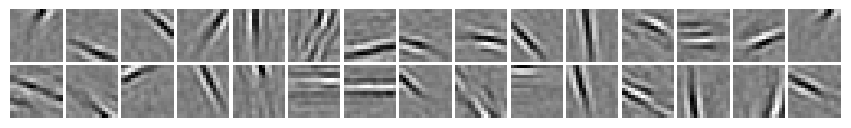

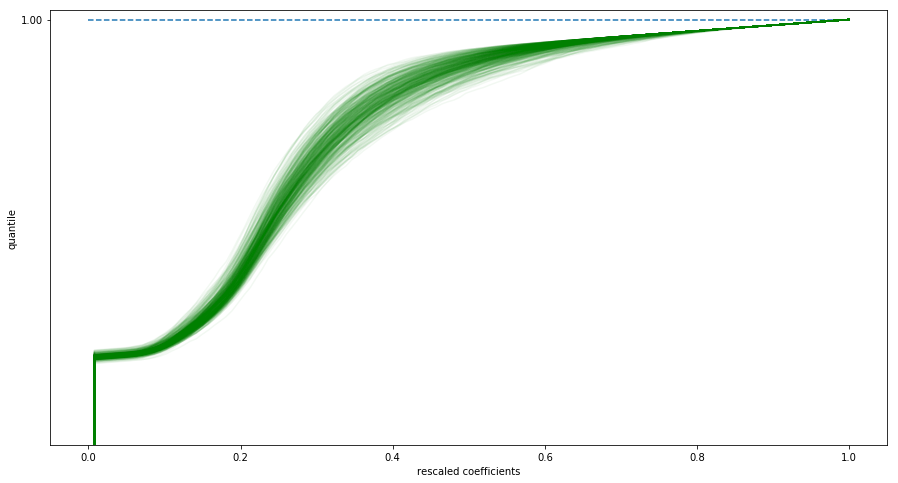

Running variable alpha_homeo with value 5.3724


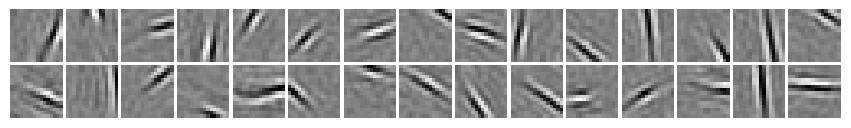

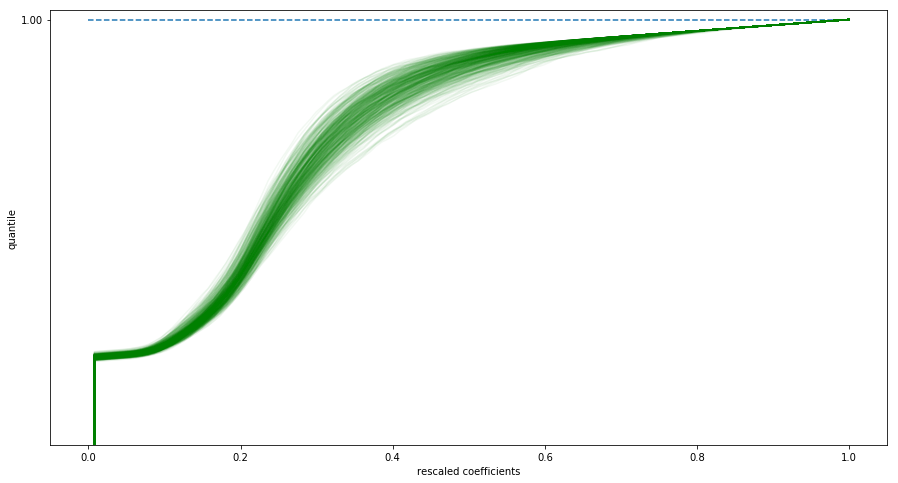

Running variable alpha_homeo with value 7.8756


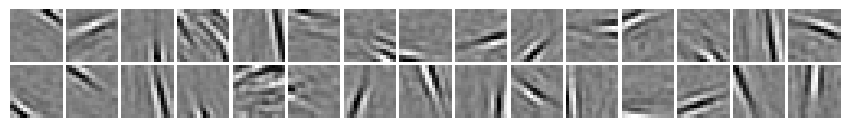

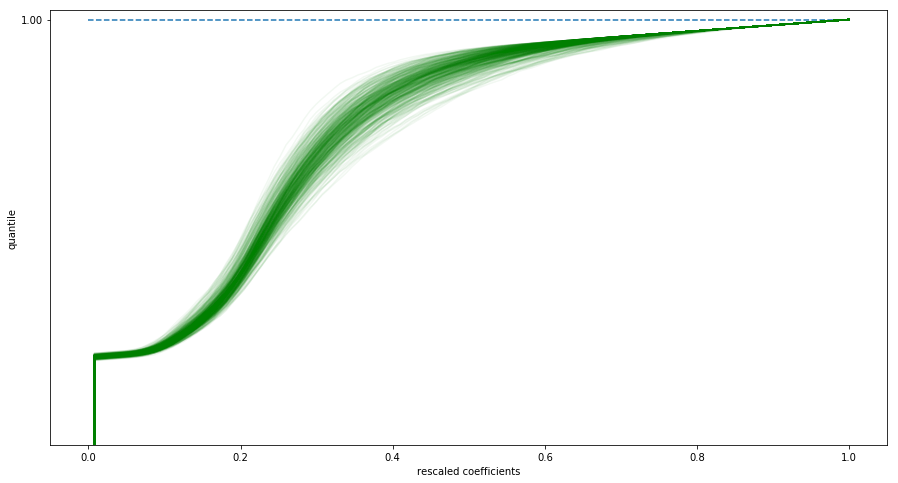

Running variable alpha_homeo with value 11.5451


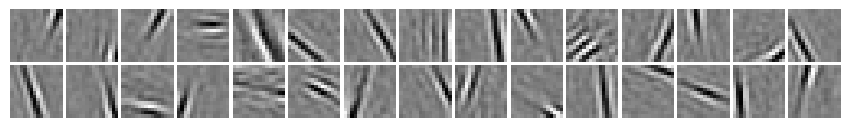

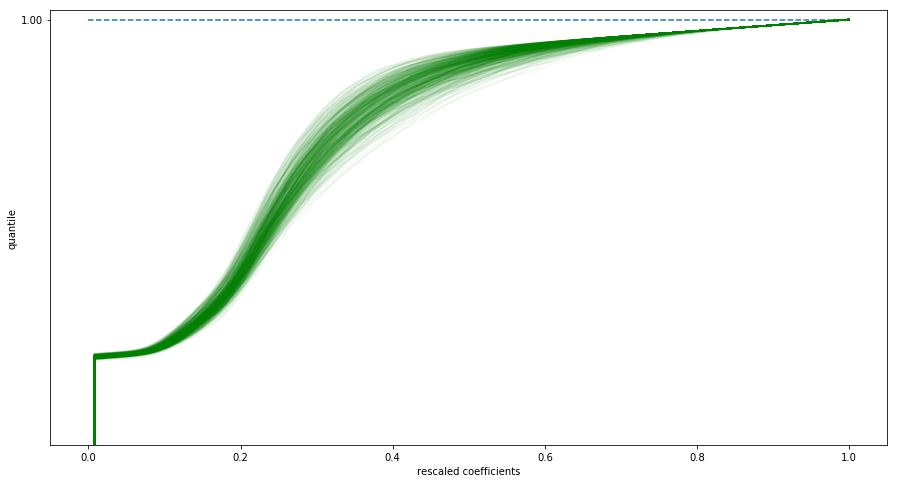

Time evolution of  error


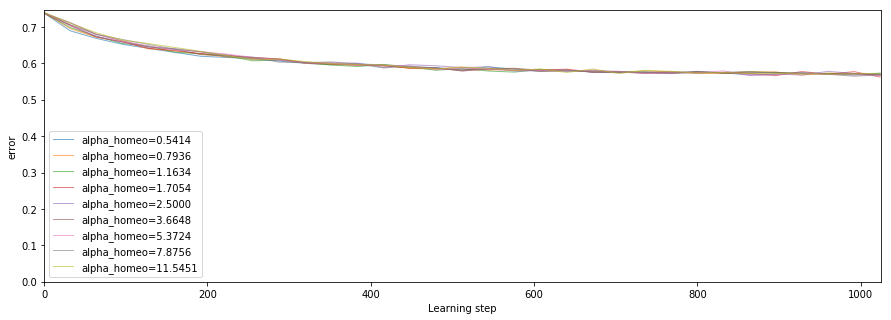

Time evolution of  qerror


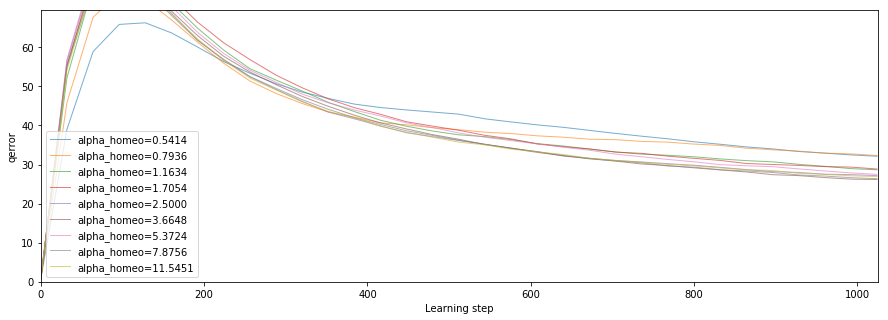

Time evolution of  F


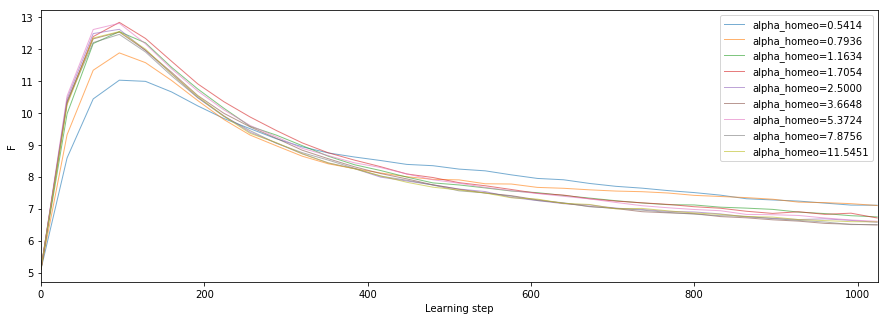

Comparison at the end of learning for  error


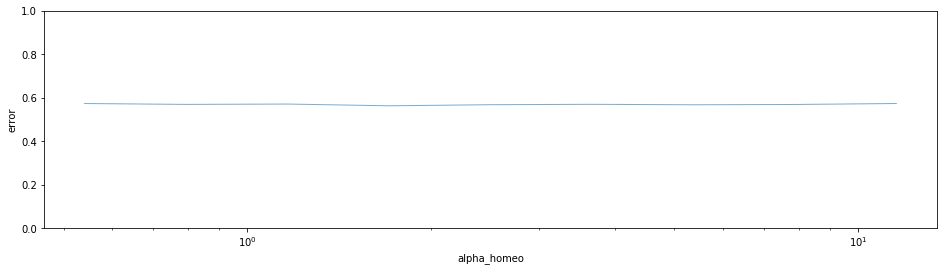

Comparison at the end of learning for  qerror


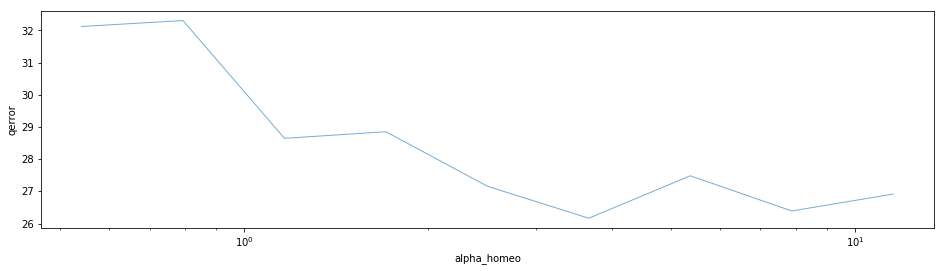

Comparison at the end of learning for  F


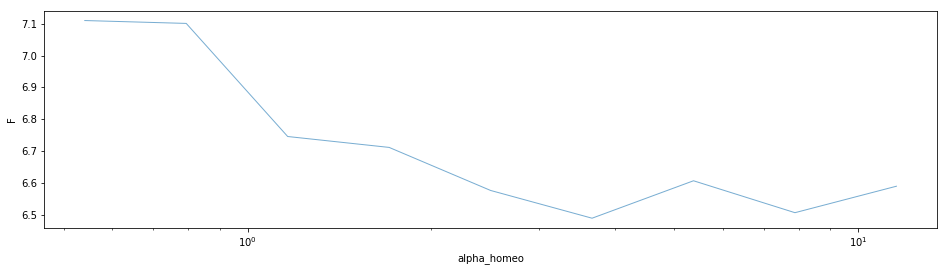

Running variable l0_sparseness with value 2


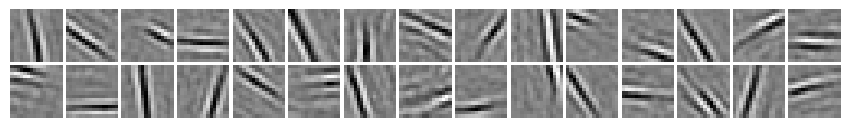

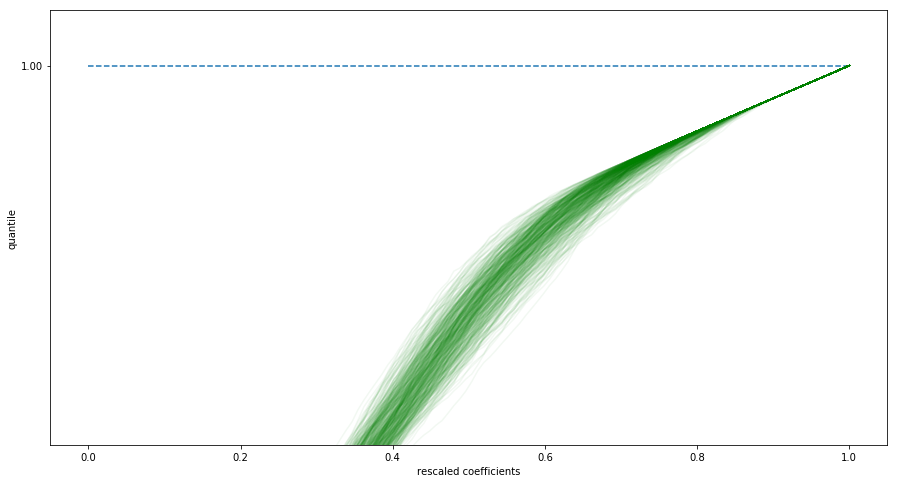

Running variable l0_sparseness with value 4


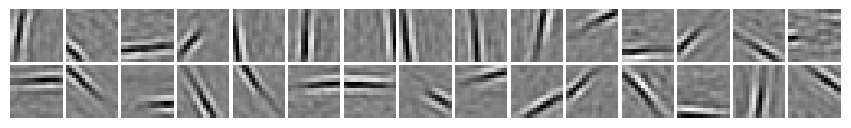

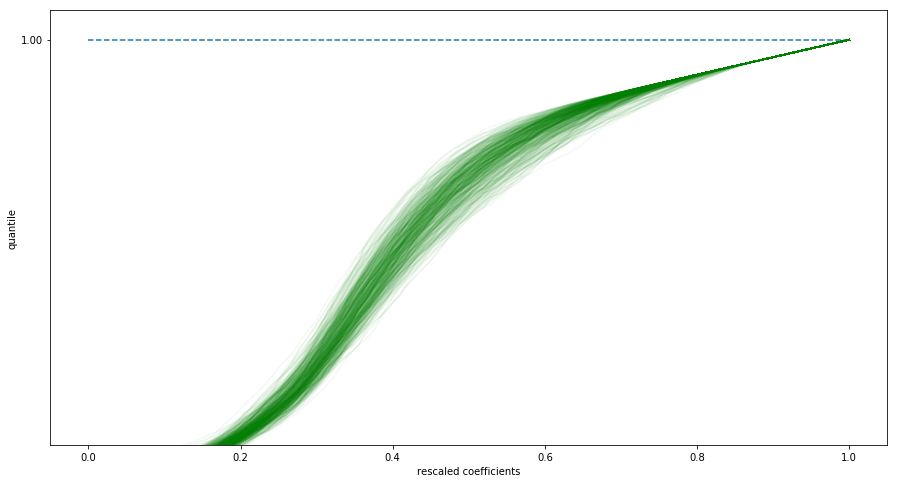

Running variable l0_sparseness with value 6


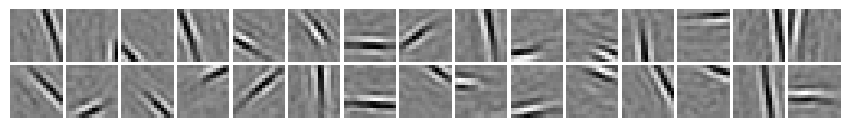

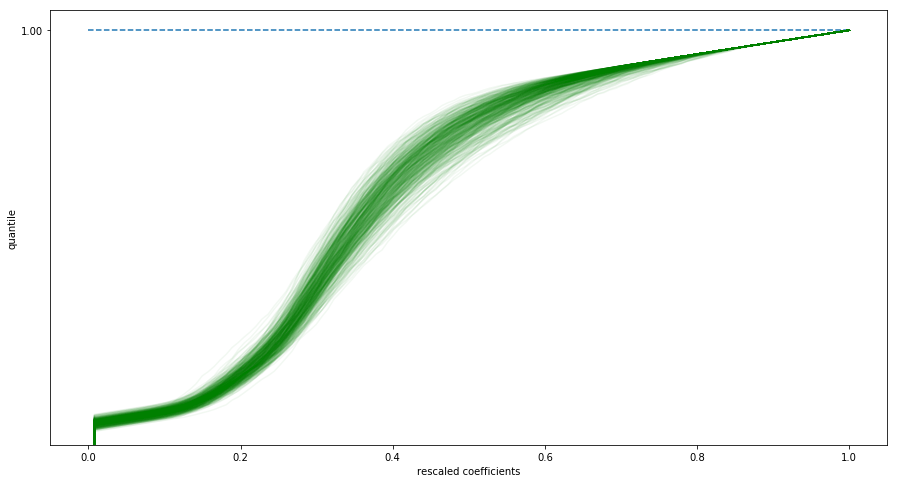

Running variable l0_sparseness with value 8


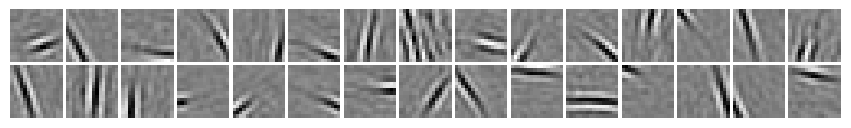

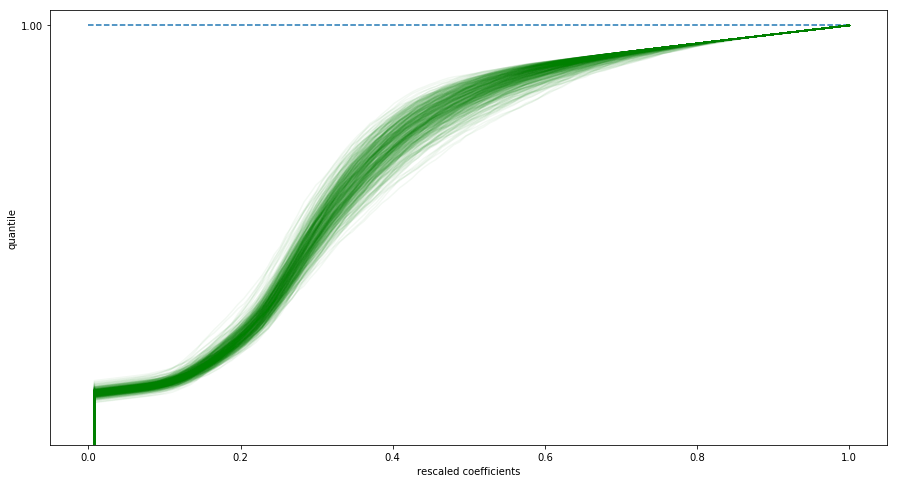

Running variable l0_sparseness with value 13


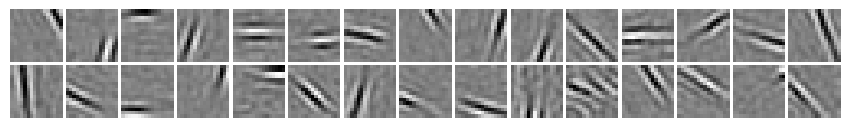

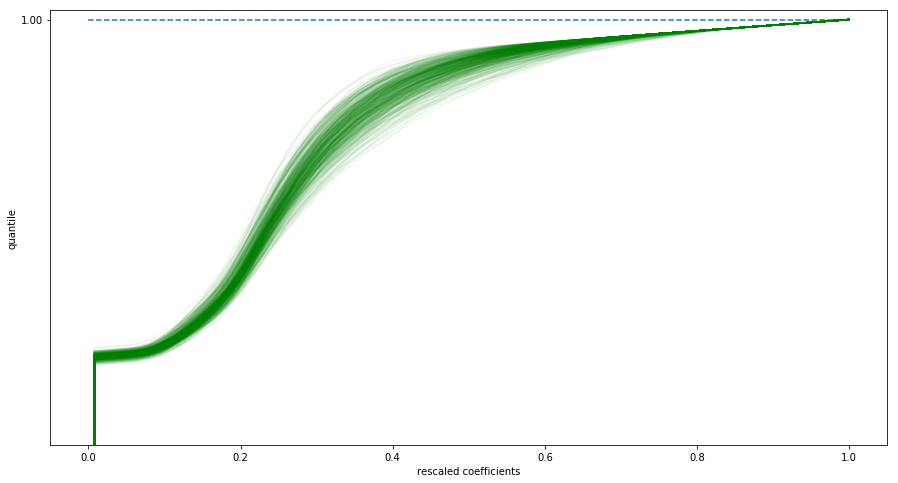

Running variable l0_sparseness with value 19


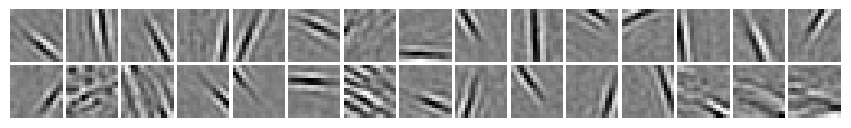

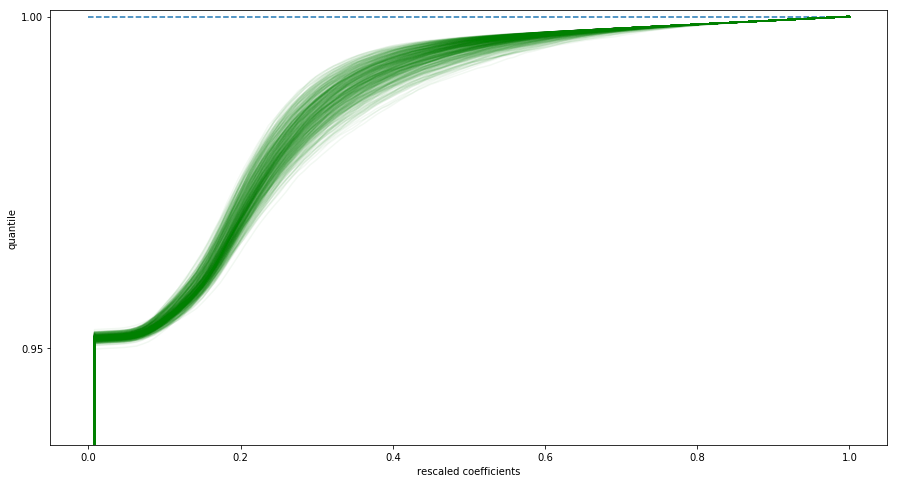

Running variable l0_sparseness with value 27


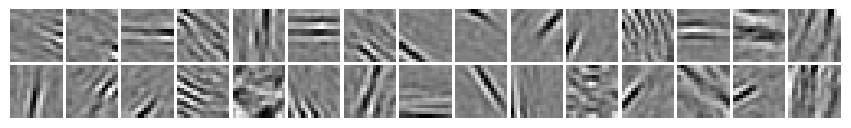

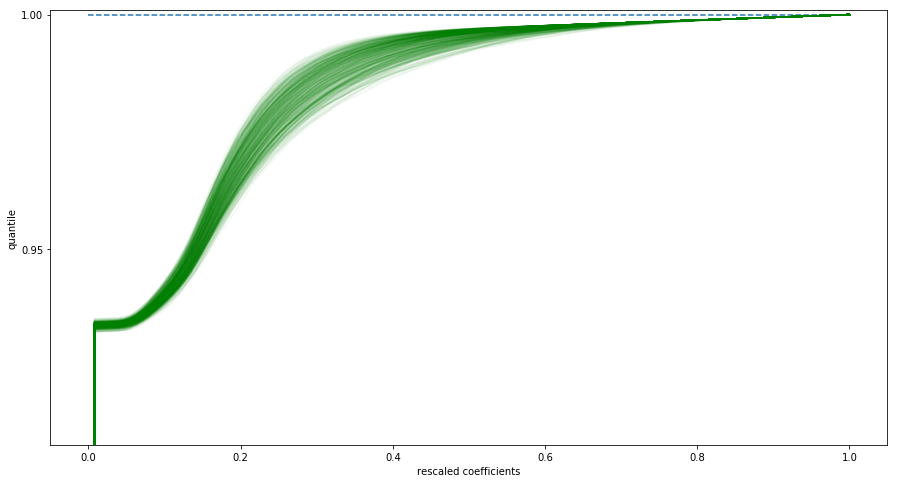

Running variable l0_sparseness with value 40


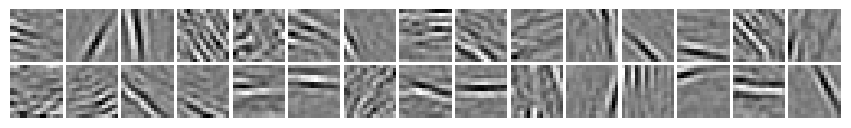

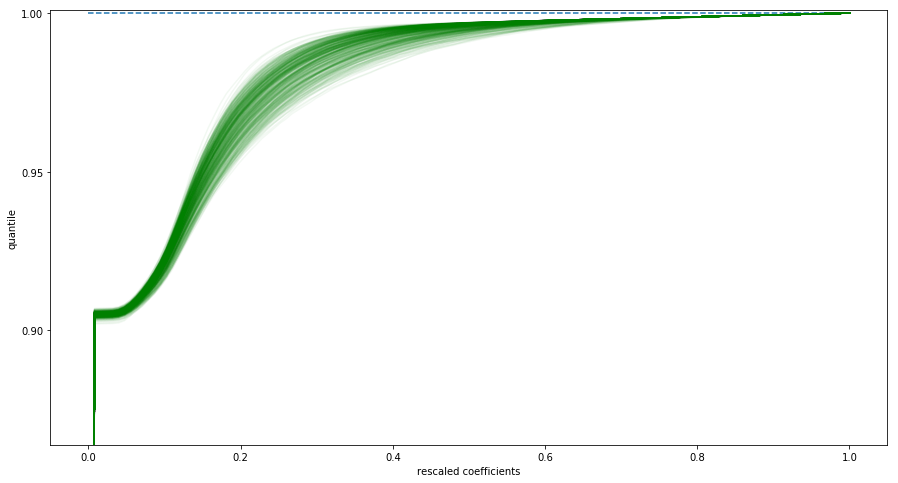

Running variable l0_sparseness with value 60


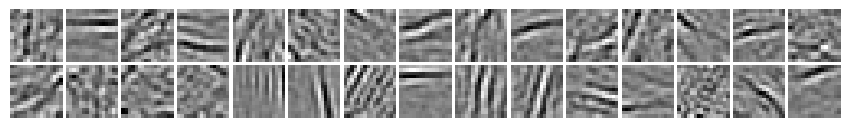

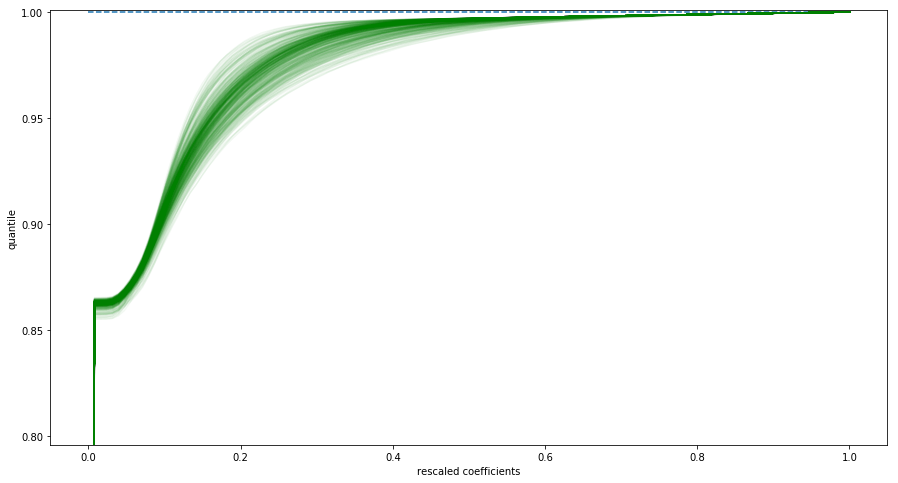

Time evolution of  error


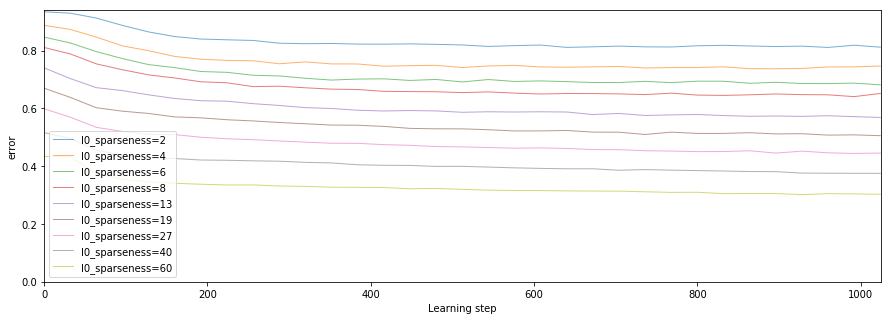

Time evolution of  qerror


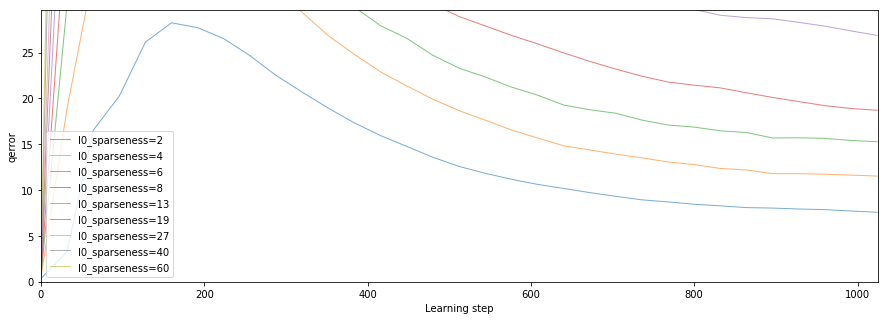

Time evolution of  F


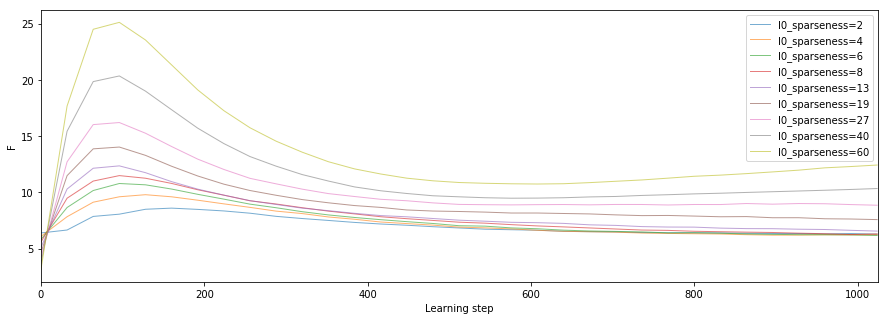

Comparison at the end of learning for  error


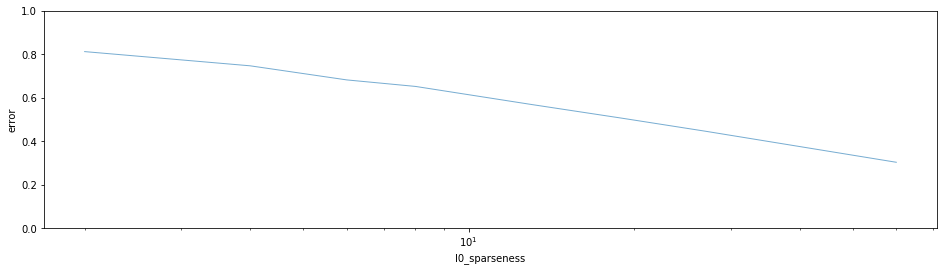

Comparison at the end of learning for  qerror


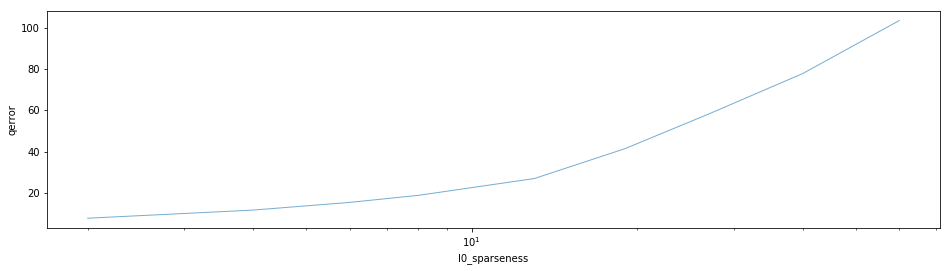

Comparison at the end of learning for  F


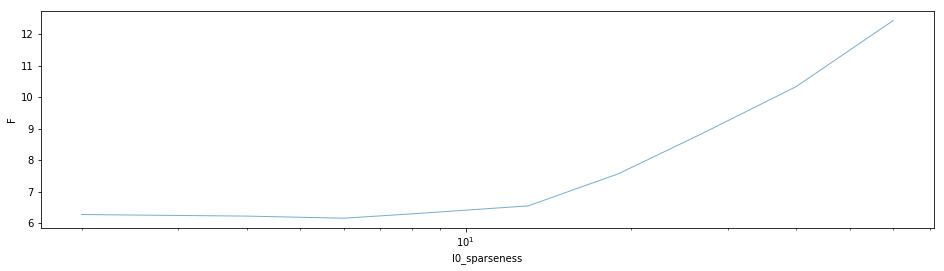

In [11]:
%run {experiments.shl.cache_dir}/{tag}.py plot

In [10]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 18.0.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.2
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Thu Sep 27 14:28:22 2018 CEST